In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [263]:
test =  pd.read_csv("test.csv" , sep=',')
train =  pd.read_csv("train.csv" , sep=',')



In [264]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [265]:
passageiros_classe = train.groupby("Pclass")["PassengerId"].count()
print(passageiros_classe)

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


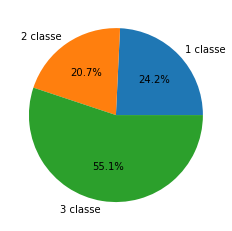

In [266]:
classes = ["1 classe", "2 classe", "3 classe"]

plt.pie(passageiros_classe, labels = classes, startangle=0, autopct='%1.1f%%')
plt.show()

Sobreviventes por classe: 


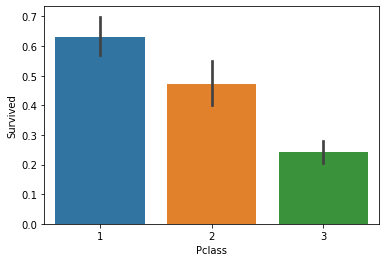

In [277]:
print("Sobreviventes por classe: ")
sns.barplot(x="Pclass", y="Survived", data=train)

In [268]:
passageiros_genero = train.groupby("Sex")["PassengerId"].count()
print(passageiros_genero)

Sex
female    314
male      577
Name: PassengerId, dtype: int64


Text(0, 0.5, '')

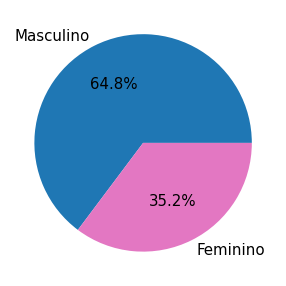

In [269]:
train["Sex"].value_counts().plot.pie(colors=('tab:blue', 'tab:pink'),  fontsize=15, startangle=0,autopct='%1.1f%%', labels=('Masculino','Feminino'), figsize=(5,5)).set_ylabel('')

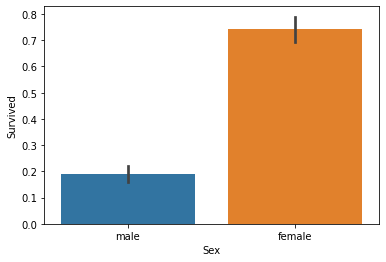

In [270]:
sns.barplot(x="Sex", y="Survived", data=train)

In [271]:
passageiros_idade = train.groupby("Age")["PassengerId"].count()
print(passageiros_idade)

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: PassengerId, Length: 88, dtype: int64


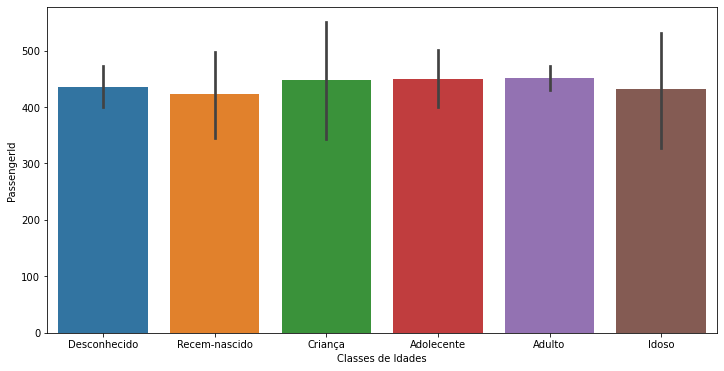

In [272]:
train["Age"] = train["Age"].fillna(-0.5)
idades = [-1, 0, 8, 15, 20, 60, np.inf]
nomes_idades = ['Desconhecido', 'Recem-nascido', 'Criança', 'Adolecente', 'Adulto', 'Idoso']
train['Classes de Idades'] = pd.cut(train["Age"], idades, labels = nomes_idades)
tamanho = (12, 6)
fig, ax = plt.subplots(figsize=tamanho)
sns.barplot(x="Classes de Idades", y="PassengerId", ax = ax, data=train)
plt.show()

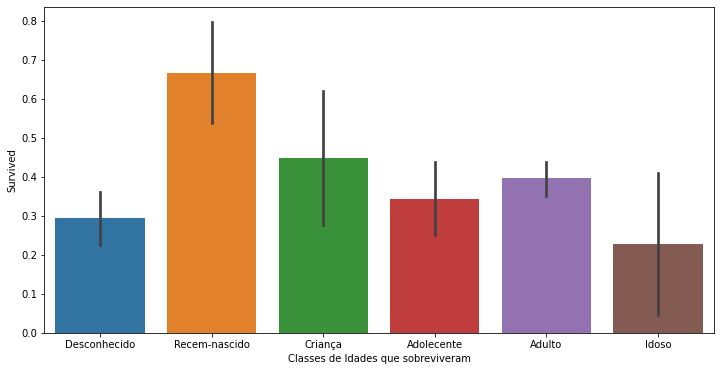

In [273]:
train["Age"] = train["Age"].fillna(-0.5)
idades = [-1, 0, 8, 15, 20, 60, np.inf]
nomes_idades = ['Desconhecido', 'Recem-nascido', 'Criança', 'Adolecente', 'Adulto', 'Idoso']
train['Classes de Idades que sobreviveram'] = pd.cut(train["Age"], idades, labels = nomes_idades)
tamanho = (12, 6)
fig, ax = plt.subplots(figsize=tamanho)
sns.barplot(x="Classes de Idades que sobreviveram", y="Survived", ax = ax, data=train)
plt.show()

In [274]:
sobreviventes = train['Survived'].value_counts()[1]
falecidos = train['Survived'].value_counts()[0]

print("Sobreviventes = ",sobreviventes)
print("Falecidos = ",falecidos)

Sobreviventes =  342
Falecidos =  549


Text(0, 0.5, '')

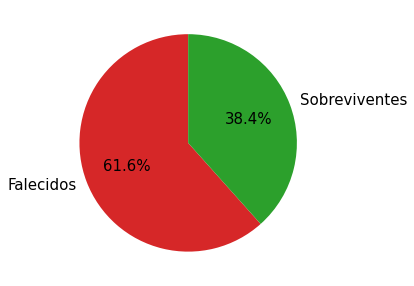

In [275]:
train['Survived'].value_counts().plot.pie(colors=('tab:red', 'tab:green'),  fontsize=15, startangle=90,autopct='%1.1f%%', labels=('Falecidos','Sobreviventes'), figsize=(5,5)).set_ylabel('')